In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
data = pd.read_excel("C:/Users/senth/Downloads/default of credit card clients.xls",header = 1)

In [5]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
data.shape

(30000, 25)

In [7]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [8]:
data['default payment next month'].unique()

array([1, 0], dtype=int64)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [10]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

Text(0, 0.5, 'COUNT')

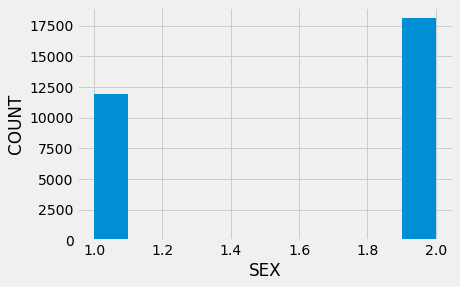

In [13]:
data['SEX'].hist()
plt.xlabel('SEX')
plt.ylabel('COUNT')

In [15]:
data['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

Checking the number of counts of defaulters and non defaulters sexwise

<AxesSubplot:xlabel='SEX', ylabel='count'>

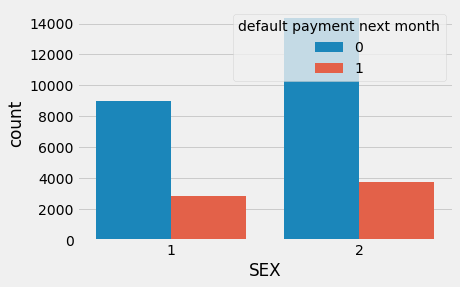

In [22]:
sns.countplot(x = 'SEX', data=data,hue = "default payment next month")

C:\Users\senth\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='default payment next month', ylabel='count'>

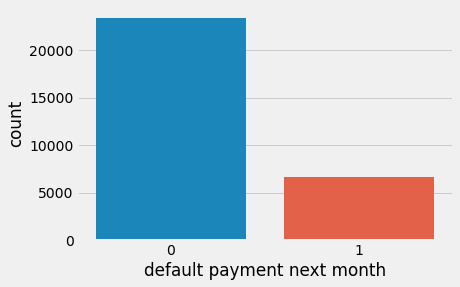

In [21]:
sns.countplot(data['default payment next month'])

In [24]:
correlation = data.corr()

<AxesSubplot:>

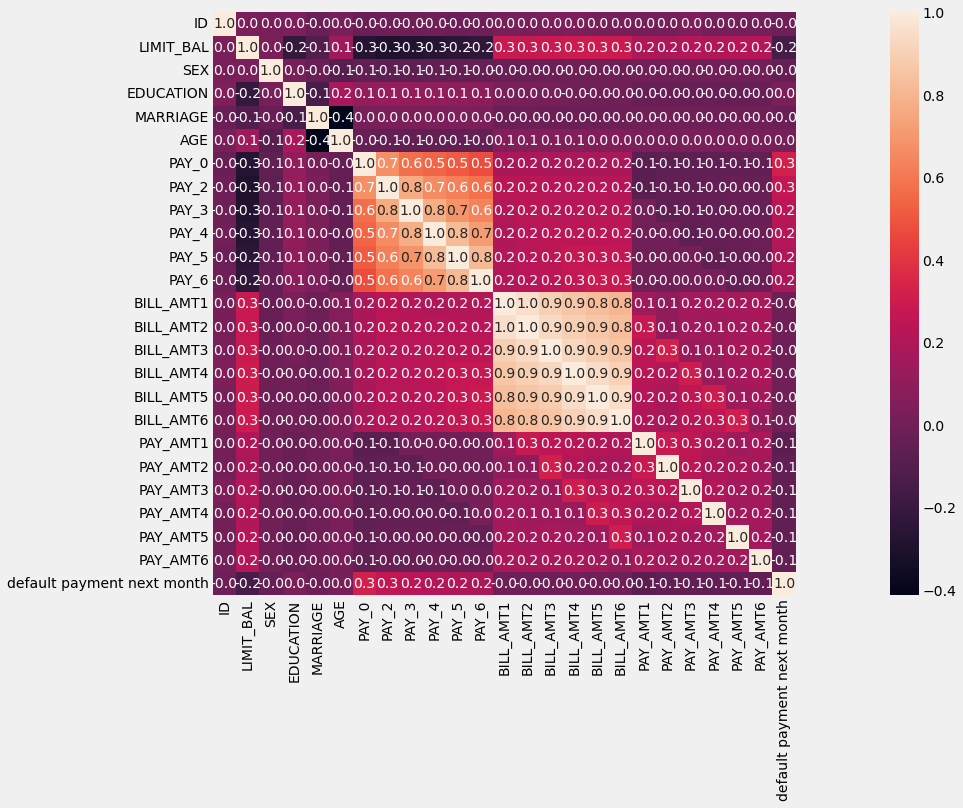

In [29]:
plt.subplots(figsize=(30,10))
sns.heatmap( correlation, square=True, annot=True,fmt=".1f")

<AxesSubplot:>

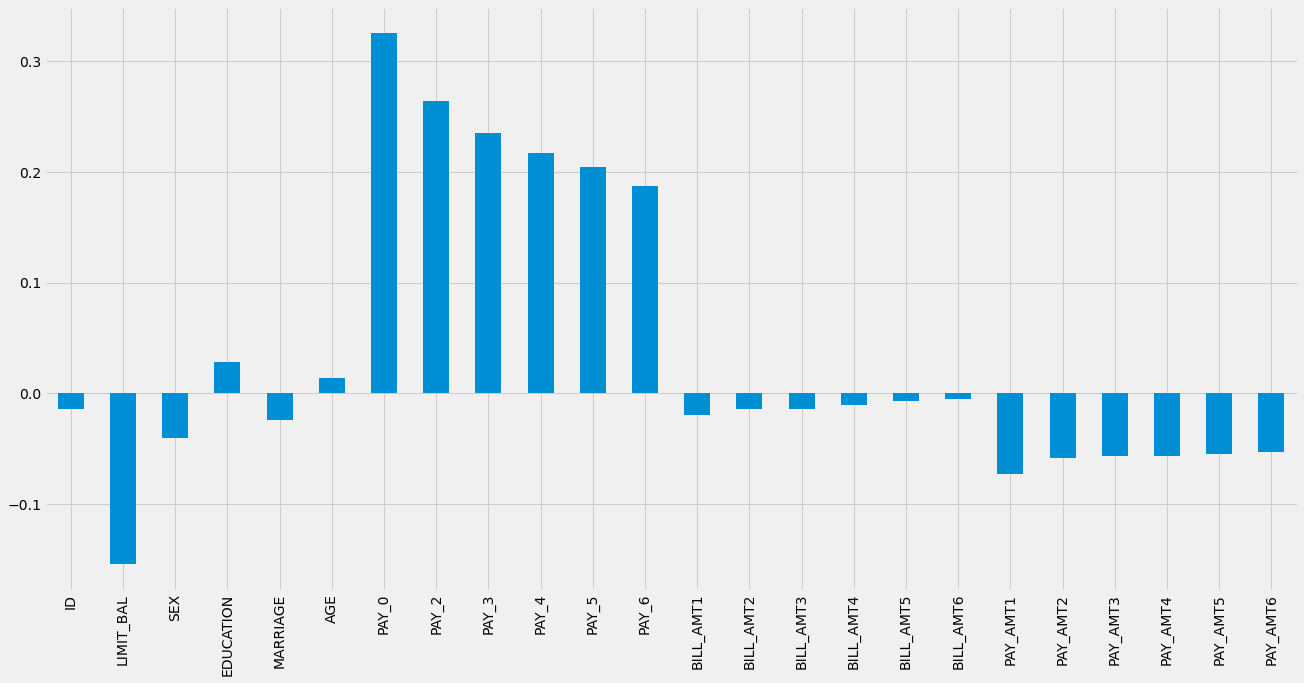

In [31]:
x = data.drop("default payment next month",axis =1)
x.corrwith(data['default payment next month']).plot.bar(figsize = (20, 10))

####  It seems from the above graph is that most negatively correlated feature is LIMIT_BAL but we cannot blindly remove this feature because according to me it is very important feature for prediction. ID is unimportant and it has no role in prediction so we will remove  

In [33]:
data.drop('ID',axis = 1,inplace = True)

In [34]:
y = data["default payment next month"]

In [35]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.2,random_state=10)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
model = LogisticRegression()

In [38]:
model.fit(train_x,train_y)

C:\Users\senth\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
predicted_y = model.predict(test_x)

In [40]:
model.score(test_x,test_y)

0.7801666666666667

In [41]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_y,predicted_y)

0.21983333333333333

In [42]:
model.intercept_

array([-9.0587919e-08])

In [43]:
model.coef_

array([[-2.63981479e-05, -3.87508360e-06, -1.73942492e-07,
        -1.90946904e-07, -1.90210108e-07, -2.41455828e-06,
         4.69540043e-07,  3.76763337e-07,  3.28328024e-07,
         2.96536595e-07,  2.68519909e-07,  2.48976711e-07,
        -9.72053311e-06,  6.49407759e-06,  1.12798704e-06,
         3.89421647e-06,  3.73312516e-07,  2.26749484e-06,
        -3.40462072e-05, -2.22663985e-05, -9.73393435e-06,
        -9.13671546e-06, -5.29236551e-06, -1.08185818e-06]])

In [44]:
rmse = np.sqrt(mean_squared_error(test_y,predicted_y))
rmse

0.4688638750568584

In [45]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [46]:
model.fit(train_x,train_y)

DecisionTreeClassifier()

In [47]:
predicted_y = model.predict(test_x)

In [48]:
model.score(test_x,test_y)

0.724